**About Company**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
'''
LOAN DATASET
'''

# required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
# read the dataset
data = pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print('\n\nColumn Names\n\n')
print(data.columns)



Column Names


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
#label encode the target variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [5]:
# drop the null values
data.dropna(how='any',inplace=True)

In [6]:
# train-test-split   
train , test = train_test_split(data,test_size=0.2,random_state=0)

In [7]:
# seperate the target and independent variable
train_x = train.drop(columns=['Loan_ID','Loan_Status'],axis=1)
train_y = train['Loan_Status']

test_x = test.drop(columns=['Loan_ID','Loan_Status'],axis=1)
test_y = test['Loan_Status']

In [8]:
# encode the data
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

shape of training data :  (384, 20)
shape of testing data :  (96, 20)


In [9]:
# create the object of the model
model = LogisticRegression(random_state=0)

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',predict)

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))


Predicted Values on Test Data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1]


Accuracy Score on test data : 


0.7604166666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Grid search

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [13]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1)
logreg_cv.fit(train_x,train_y)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8203125


In [14]:
logreg2=LogisticRegression(C=1,penalty="l1")
logreg2.fit(train_x,train_y)
print("score",logreg2.score(test_x,test_y))

score 0.75


# Data visualization

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
len(data)

480

In [17]:
len(data["Dependents"].unique())

4

In [18]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
data.groupby(['Gender','Married','Education']).size().unstack().plot(kind='bar', stacked=True,ax=ax1)
data.groupby(['Gender','Education','Self_Employed']).size().unstack().plot(kind='bar', stacked=True,ax=ax2)
data.groupby(['Gender','Property_Area']).size().unstack().plot(kind='bar', stacked=True,ax=ax3)
data.groupby(['Gender','Dependents']).size().unstack().plot(kind='bar', stacked=True,ax=ax4)

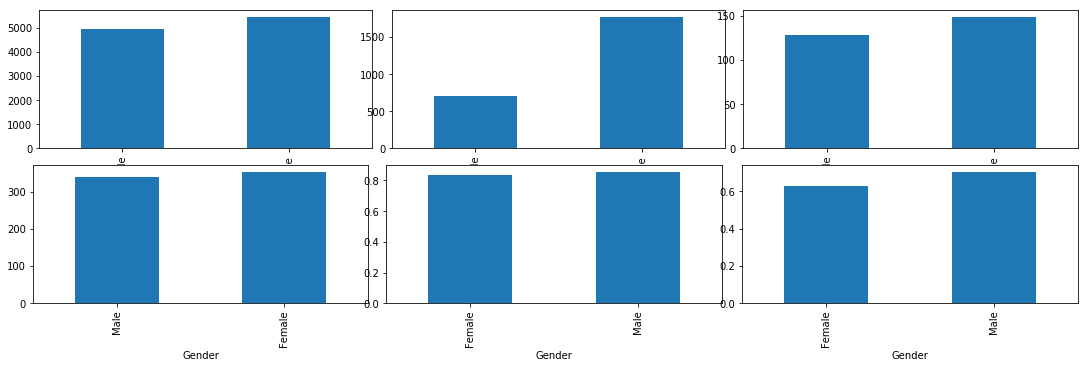

In [20]:
fig = plt.figure(figsize=(15,5),constrained_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
data.groupby('Gender')['ApplicantIncome'].mean().sort_values().plot(kind='bar', ax=ax1)
# for p in ax1.patches:
#     ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
data.groupby('Gender')['CoapplicantIncome'].mean().sort_values().plot(kind='bar', ax=ax2)
data.groupby('Gender')['LoanAmount'].mean().sort_values().plot(kind='bar', ax=ax3)
data.groupby('Gender')['Loan_Amount_Term'].mean().sort_values().plot(kind='bar', ax=ax4)
data.groupby('Gender')['Credit_History'].mean().sort_values().plot(kind='bar', ax=ax5)
data.groupby('Gender')['Loan_Status'].mean().sort_values().plot(kind='bar', ax=ax6)